In [1]:
#bibliotecas

from coppeliasim_zmqremoteapi_client import RemoteAPIClient
import numpy as np
import matplotlib.pyplot as plt
import time
import math

### Questão 3

In [ ]:
# bloco - 1
client = RemoteAPIClient()
sim = client.require("sim")
sim.setStepping(True)

class ObjetoCoppelia:
    def __init__(self, nome):
        self.nome = nome
        self.objeto = sim.getObject('/' + nome)  # pega o objeto do CoppeliaSim

        # Formato [x, y, \theta]
        posicao  = sim.getObjectPosition(self.objeto)
        orientacao = sim.getObjectOrientation(self.objeto)
        self.posicao = [posicao[0],posicao[1],orientacao[2]]

    def getPosition(self):
        # Formato [x, y, \theta]
        return self.posicao
    
    def getObjetoOriginal(self):
        return self.objeto
    
    def setNewPosition(self,position):
        self.posicao = position

# Pegando objetos da cena
robot = ObjetoCoppelia("PioneerP3DX")
pessoa_1  = ObjetoCoppelia("Bill") 
pessoa_2 = ObjetoCoppelia("diningChair/Bill") 
vazo = ObjetoCoppelia("indoorPlant") 
estante = ObjetoCoppelia("rack") 
mesa = ObjetoCoppelia("customizableTable") 
manta = ObjetoCoppelia("Manta") 

objetos = {
    'Robô': robot,
    'Pessoa 1': pessoa_1,
    'Pessoa 2': pessoa_2,
    'Vazo': vazo,
    'Armario': estante,
    'Mesa': mesa,
    'Manta': manta
}

Coordenadas x, y e theta do Robot :[-1.550, -0.425, -0.436]
Coordenadas x, y e theta do Pessoa 1 :[1.650, -2.050, 1.658]
Coordenadas x, y e theta do Pessoa 2 :[-0.167, 1.471, 1.483]
Coordenadas x, y e theta do Vazo :[1.725, -1.425, -1.571]
Coordenadas x, y e theta do Estante :[-0.600, -2.225, -1.571]
Coordenadas x, y e theta do Mesa :[-0.100, 1.650, -0.000]
Coordenadas x, y e theta do Manta :[1.750, 1.427, -0.000]


/tmp/ipykernel_67218/3542711123.py:95: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


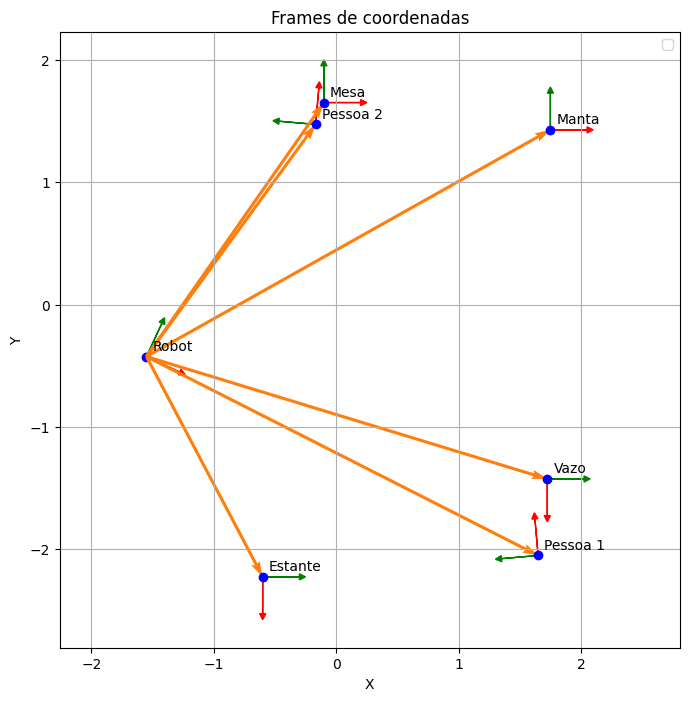

Coordenadas x, y e theta do Robot :[0.000, 0.000, 0.000]
--------------------------------------------------------------------------
Transformação feita pela biblioteca Pessoa 1: [3.587, -0.120, 2.094]
Coordenadas no referencial do robô Pessoa 1 :[3.587, -0.120, 2.094]
--------------------------------------------------------------------------
Transformação feita pela biblioteca Pessoa 2: [0.452, 2.303, 1.920]
Coordenadas no referencial do robô Pessoa 2 :[0.452, 2.303, 1.920]
--------------------------------------------------------------------------
Transformação feita pela biblioteca Vazo: [3.391, 0.478, -1.134]
Coordenadas no referencial do robô Vazo :[3.391, 0.478, -1.134]
--------------------------------------------------------------------------
Transformação feita pela biblioteca Estante: [1.622, -1.230, -1.134]
Coordenadas no referencial do robô Estante :[1.622, -1.230, -1.134]
--------------------------------------------------------------------------
Transformação feita pela bibli

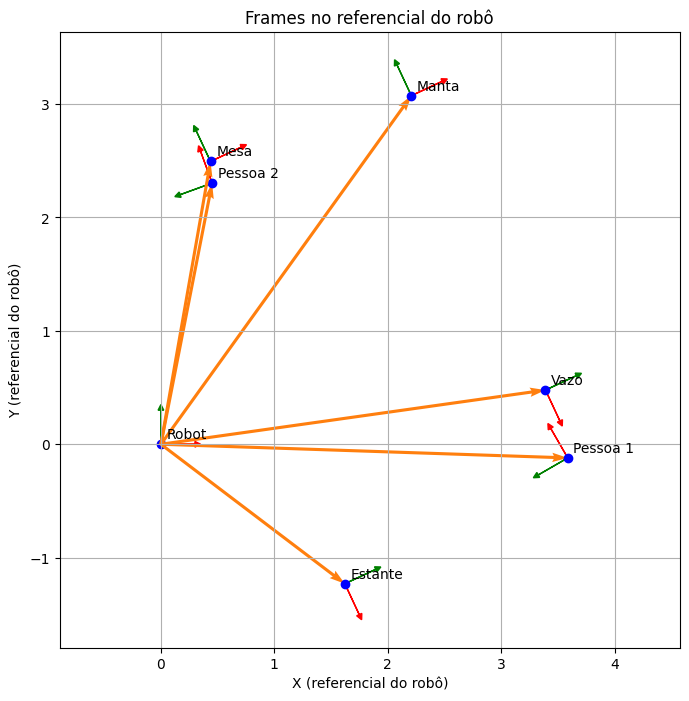

In [4]:
# bloco 2
def plot_intercessao(obj1,obj2,color):
    dx = obj2[0] - obj1[0]  # componente x do vetor
    dy = obj2[1] - obj1[1]  # componente y do vetor
    
    plt.quiver(
        obj1[0], obj1[1],   # ponto inicial
        dx, dy,             # direção do vetor
        angles='xy', scale_units='xy', scale=1, 
        color=color, width=0.005
    )


def frame_global_to_robot(obj, robot):
    x_r, y_r, theta_r = robot.getPosition()
    x_o, y_o, theta_o = obj.getPosition()

    # Matriz homogênea do objeto no global
    T_obj = np.array([
        [np.cos(theta_o), -np.sin(theta_o), x_o],
        [np.sin(theta_o),  np.cos(theta_o), y_o],
        [0, 0, 1]
    ])

    # Matriz inversa do robô
    T_robot_inv = np.array([
        [np.cos(theta_r), np.sin(theta_r), -x_r*np.cos(theta_r) - y_r*np.sin(theta_r)],
        [-np.sin(theta_r), np.cos(theta_r), x_r*np.sin(theta_r) - y_r*np.cos(theta_r)],
        [0, 0, 1]
    ])

    # Transformação do objeto no referencial do robô
    T_obj_robot = T_robot_inv @ T_obj

    
    x, y = T_obj_robot[0, 2], T_obj_robot[1, 2]

    # Orientação relativa: theta_obj - theta_robot
    theta_rel = np.arctan2(T_obj_robot[1, 0], T_obj_robot[0, 0])

    return x, y, theta_rel
    



def plot_frame(objetos, robot,trasnformada):

    frame_size = 0.3

    for nome, obj in objetos.items():

        if not trasnformada:
            pos = obj.getPosition()
            x, y, theta = pos[0], pos[1], pos[2]
            plot_intercessao(robot.getPosition(), obj.getPosition(), "#ff7f0e") 
            print(f'Coordenadas x, y e theta do {nome} :[{pos[0]:.3f}, {pos[1]:.3f}, {pos[2]:.3f}]')

        if trasnformada:
            if obj == robot:
                x, y, theta = 0, 0, 0  # o robô é a origem do sistema local
                print(f'Coordenadas x, y e theta do {nome} :[{x:.3f}, {y:.3f}, {theta:.3f}]')
                
            else:
                bibPosicao = sim.getObjectPosition(obj.getObjetoOriginal(),robot.getObjetoOriginal())
                bibRotacao = sim.getObjectOrientation(obj.getObjetoOriginal(),robot.getObjetoOriginal(),)

                print("--------------------------------------------------------------------------")
                print(f"Transformação feita pela biblioteca {nome}: [{bibPosicao[0]:.3f}, {bibPosicao[1]:.3f}, {bibRotacao[2]:.3f}]")

 
                pos = obj.getPosition()
                x, y, theta = frame_global_to_robot(obj, robot)
                plot_intercessao([0,0,0], [x,y,theta], "#ff7f0e") 
                print(f'Coordenadas no referencial do robô {nome} :[{x:.3f}, {y:.3f}, {theta:.3f}]')
                

        # direção dos vetores do plot
        u_x = frame_size  * np.cos(theta)
        v_x = frame_size  * np.sin(theta)
        u_y = -frame_size * np.sin(theta)
        v_y = frame_size  * np.cos(theta)

        plt.arrow(x, y, u_x, v_x, head_width=0.05, head_length=0.05, color='red')
        plt.arrow(x, y, u_y, v_y, head_width=0.05, head_length=0.05, color='green')
        plt.text(x + 0.05, y + 0.05, nome)
        plt.scatter(x, y, color='blue')
        
        
    if not trasnformada:
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Frames de coordenadas')
        plt.grid(True)
        plt.axis('equal')
        plt.legend()
        plt.show()

    if trasnformada:
        plt.xlabel('X (referencial do robô)')
        plt.ylabel('Y (referencial do robô)')
        plt.title('Frames no referencial do robô')
        plt.grid(True)
        plt.axis('equal')
        plt.show()


plt.figure(figsize=(8,8))
plot_frame(objetos,robot,False)
plt.figure(figsize=(8,8))
plot_frame(objetos,robot,True)

### Questão 4

Coordenadas x, y e theta do Robot :[0.000, 0.000, 0.000]
--------------------------------------------------------------------------
Transformação feita pela biblioteca Pessoa 1: [2.570, -0.898, 2.094]
Coordenadas no referencial do robô Pessoa 1 :[2.570, -0.898, 2.094]
--------------------------------------------------------------------------
Transformação feita pela biblioteca Pessoa 2: [-0.565, 1.526, 1.920]
Coordenadas no referencial do robô Pessoa 2 :[-0.565, 1.526, 1.920]
--------------------------------------------------------------------------
Transformação feita pela biblioteca Vazo: [2.374, -0.300, -1.134]
Coordenadas no referencial do robô Vazo :[2.374, -0.300, -1.134]
--------------------------------------------------------------------------
Transformação feita pela biblioteca Estante: [0.605, -2.007, -1.134]
Coordenadas no referencial do robô Estante :[0.605, -2.007, -1.134]
--------------------------------------------------------------------------
Transformação feita pela b

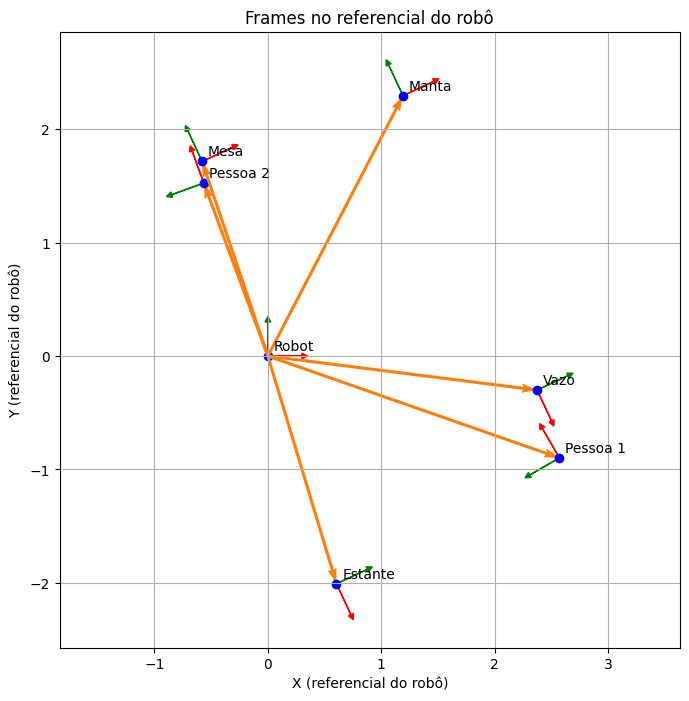

In [7]:
plt.figure(figsize=(8,8))
plot_frame(objetos,robot,True)

Coordenadas x, y e theta do Robot :[0.000, 0.000, 0.000]
--------------------------------------------------------------------------
Transformação feita pela biblioteca Pessoa 1: [-3.690, -2.024, 0.524]
Coordenadas no referencial do robô Pessoa 1 :[-3.690, -2.024, 0.524]
--------------------------------------------------------------------------
Transformação feita pela biblioteca Pessoa 2: [-1.267, 1.111, 0.349]
Coordenadas no referencial do robô Pessoa 2 :[-1.267, 1.111, 0.349]
--------------------------------------------------------------------------
Transformação feita pela biblioteca Vazo: [-3.092, -1.828, -2.705]
Coordenadas no referencial do robô Vazo :[-3.092, -1.828, -2.705]
--------------------------------------------------------------------------
Transformação feita pela biblioteca Estante: [-4.800, -0.059, -2.705]
Coordenadas no referencial do robô Estante :[-4.800, -0.059, -2.705]
--------------------------------------------------------------------------
Transformação feita 

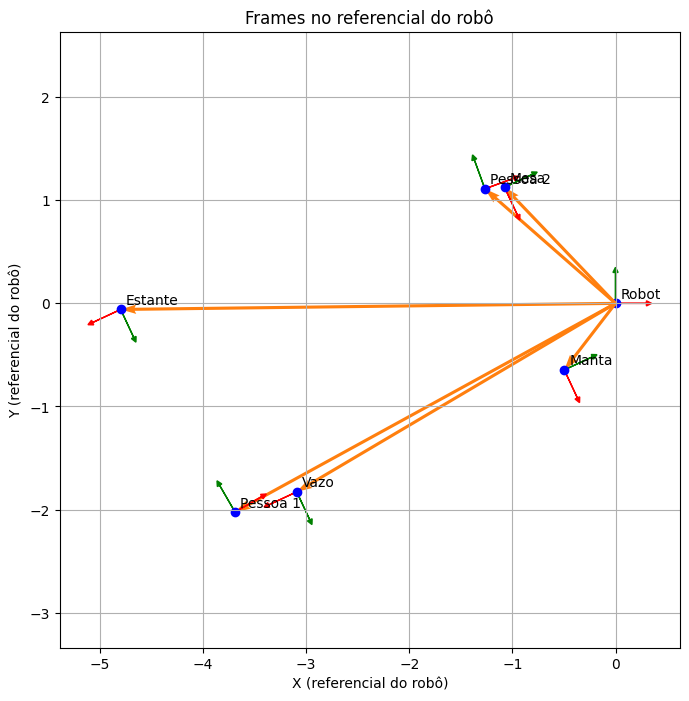

In [10]:
plt.figure(figsize=(8,8))
plot_frame(objetos,robot,True)

Coordenadas x, y e theta do Robot :[0.000, 0.000, 0.000]
--------------------------------------------------------------------------
Transformação feita pela biblioteca Pessoa 1: [2.842, -4.182, 1.484]
Coordenadas no referencial do robô Pessoa 1 :[2.842, -4.182, 1.484]
--------------------------------------------------------------------------
Transformação feita pela biblioteca Pessoa 2: [1.664, -0.399, 1.309]
Coordenadas no referencial do robô Pessoa 2 :[1.664, -0.399, 1.309]
--------------------------------------------------------------------------
Transformação feita pela biblioteca Vazo: [3.024, -3.580, -1.745]
Coordenadas no referencial do robô Vazo :[3.024, -3.580, -1.745]
--------------------------------------------------------------------------
Transformação feita pela biblioteca Estante: [0.596, -3.964, -1.745]
Coordenadas no referencial do robô Estante :[0.596, -3.964, -1.745]
--------------------------------------------------------------------------
Transformação feita pela b

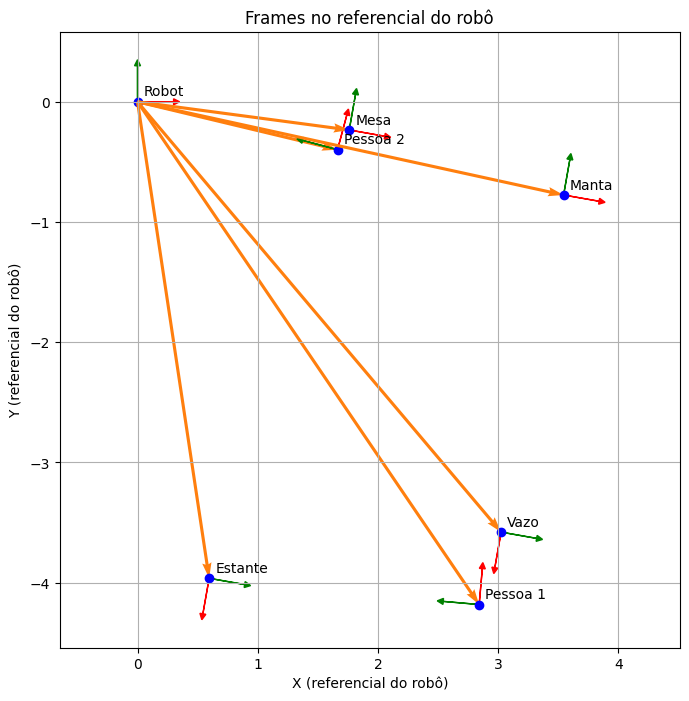

In [14]:
plt.figure(figsize=(8,8))
plot_frame(objetos,robot,True)

### Questão 5

In [2]:
class HokuyoSensorSim(object):
    _sim = None
    _base_name = ""
    _vision_sensor_name_template = "{}/sensor{}"
    _base_obj = None
    _is_range_data = False
    
    _angle_min = -120*math.pi/180
    _angle_max = 120*math.pi/180
    _angle_increment = (240/684)*math.pi/180  # angle: 240 deg, pts: 684

    def __init__(self, sim, base_name, is_range_data=True):
        self._sim = sim
        self._base_name = base_name
        self._is_range_data = is_range_data

        if "fastHokuyo" not in base_name:
            raise ValueError("ERR: fastHokuyo must be in the base object name.")

        self._base_obj = sim.getObject(base_name)
        if self._base_obj == -1:
            raise ValueError("ERR: base_obj is not a valid name in the simulation")

        self._vision_sensors_obj = [
            sim.getObject(self._vision_sensor_name_template.format(self._base_name, 1)),
            sim.getObject(self._vision_sensor_name_template.format(self._base_name, 2)),
        ]

        if any(obj == -1 for obj in self._vision_sensors_obj):
            raise ValueError("ERR: the vision sensors are not valid in the simulation")

    def getSensorData(self):
        angle = self._angle_min
        sensor_data = []
        
        for vision_sensor in self._vision_sensors_obj:
            r, t, u = sim.readVisionSensor(vision_sensor)
            if u:
                for j in range(int(u[1])):
                    for k in range(int(u[0])):
                        w = 2 + 4 * (j * int(u[0]) + k)
                        v = [u[w], u[w + 1], u[w + 2], u[w + 3]]
                        angle = angle + self._angle_increment
                        if self._is_range_data:
                            sensor_data.append([angle, v[3]])
                        else:
                            sensor_data.append([v[0], v[1], v[2]])
                            
        return np.array(sensor_data)


def transform_laser_to_global(laser_data, robot_pos, robot_ori):

    x_r, y_r = robot_pos[0], robot_pos[1]
    theta_r = robot_ori[2]  # orientação em torno de z

    global_points = []

    

    for ang, dist in laser_data:
        if dist > 0.01 and dist < 5:
            # coordenadas no robô
            x_local = dist * np.cos(ang)
            y_local = dist * np.sin(ang)

            # transformação para global
            x_global = x_r + x_local*np.cos(theta_r) - y_local*np.sin(theta_r)
            y_global = y_r + x_local*np.sin(theta_r) + y_local*np.cos(theta_r)

            global_points.append([x_global, y_global])

    return global_points

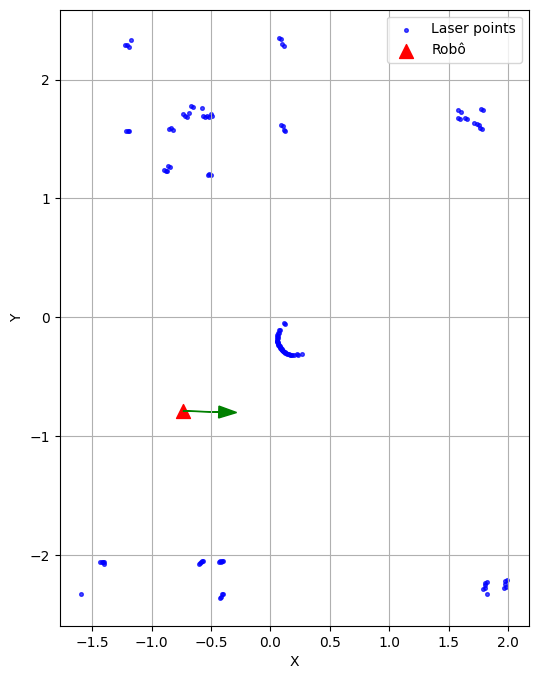

In [ ]:
def plot_laser():
  
    client = RemoteAPIClient()
    sim = client.require("sim")
    sim.setStepping(True)

    robotname = 'PioneerP3DX'
    robotHandle = sim.getObject('/' + robotname)
    sim.startSimulation()
    sim.step()


    pos_WR = sim.getObjectPosition(robotHandle, sim.handle_world)
    ori_WR = sim.getObjectOrientation(robotHandle, sim.handle_world)

   
    hokuyo =  HokuyoSensorSim(sim, "/" + robotname + "/fastHokuyo")
    laser_data = hokuyo.getSensorData()

    # Transformar pontos do laser para o referencial global
    global_pts = transform_laser_to_global(laser_data, pos_WR, ori_WR)

  
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, aspect='equal')

    
    if global_pts:
        lx, ly = zip(*global_pts)
        ax.scatter(lx, ly, s=7, c='blue', alpha=0.7, label="Laser points")

   
    x_r, y_r, theta_r = pos_WR[0], pos_WR[1], ori_WR[2]
    ax.scatter(x_r, y_r, s=100, c='red', marker='^', label="Robô")
    ax.arrow(x_r, y_r, 0.3*np.cos(theta_r), 0.3*np.sin(theta_r),
             head_width=0.1, head_length=0.15, fc='green', ec='green')

    sim.stopSimulation()

    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.grid(True)
    ax.legend()
    plt.show()

# Executa o plot
plot_laser()


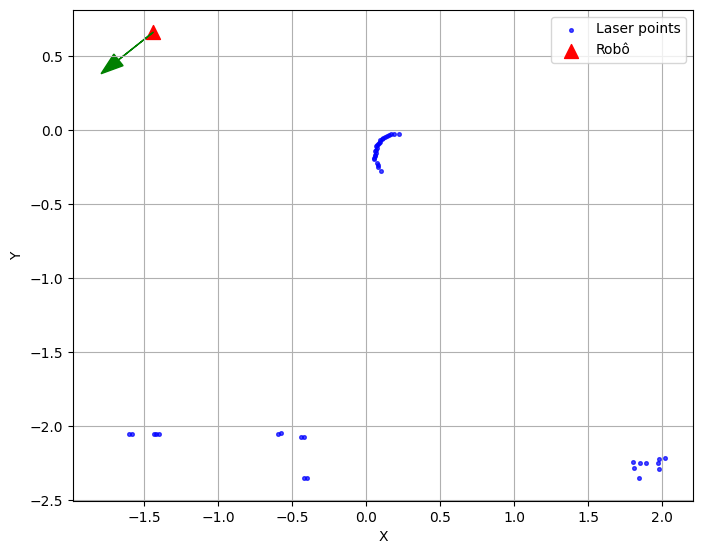

In [7]:
plot_laser()

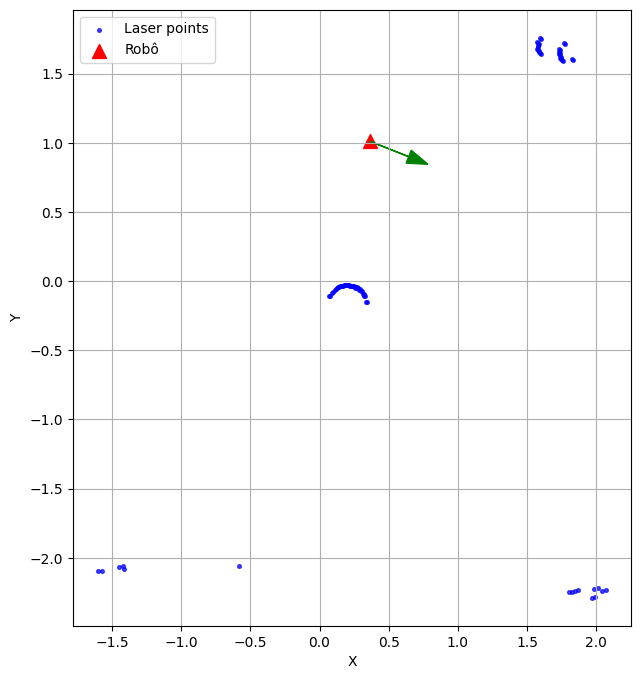

In [6]:
plot_laser()

### Questão 5

Program started
Simulation time: 0.05 [s]
Simulation time: 0.10 [s]
Simulation time: 0.15 [s]
Simulation time: 0.20 [s]
Simulation time: 0.25 [s]
Simulation time: 0.30 [s]
Simulation time: 0.35 [s]
Simulation time: 0.40 [s]
Simulation time: 0.45 [s]
Simulation time: 0.50 [s]
Simulation time: 0.55 [s]
Simulation time: 0.60 [s]
Simulation time: 0.65 [s]
Simulation time: 0.70 [s]
Simulation time: 0.75 [s]
Simulation time: 0.80 [s]
Simulation time: 0.85 [s]
Simulation time: 0.90 [s]
Simulation time: 0.95 [s]
Simulation time: 1.00 [s]
Simulation time: 1.05 [s]
Simulation time: 1.10 [s]
Simulation time: 1.15 [s]
Simulation time: 1.20 [s]
Simulation time: 1.25 [s]
Simulation time: 1.30 [s]
Simulation time: 1.35 [s]
Simulation time: 1.40 [s]
Simulation time: 1.45 [s]
Simulation time: 1.50 [s]
Simulation time: 1.55 [s]
Simulation time: 1.60 [s]
Simulation time: 1.65 [s]
Simulation time: 1.70 [s]
Simulation time: 1.75 [s]
Simulation time: 1.80 [s]
Simulation time: 1.85 [s]
Simulation time: 1.90 

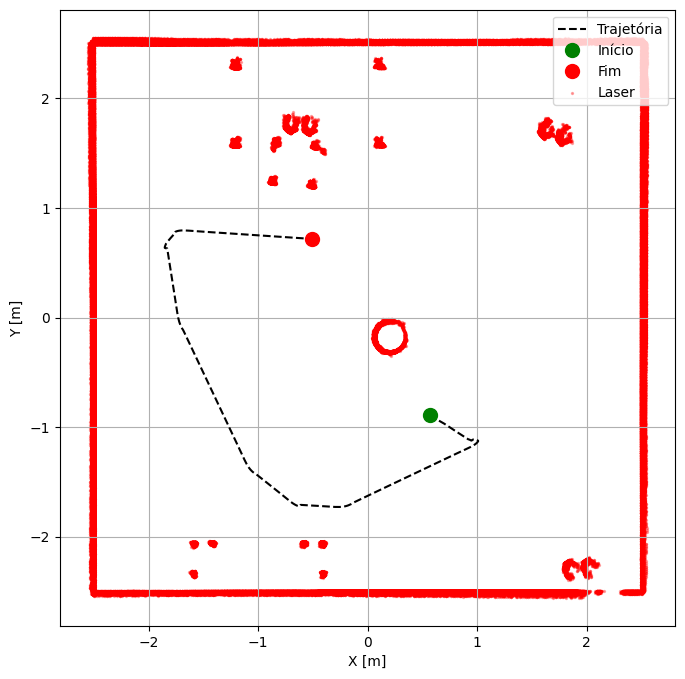

In [ ]:

print('Program started')

try:
    # Conectar ao servidor
    client = RemoteAPIClient()
    sim = client.require("sim")
    sim.setStepping(True)

    # Handles
    robotname = 'PioneerP3DX'
    robotHandle = sim.getObject('/' + robotname)
    l_wheel = sim.getObject('/' + robotname + '/leftMotor')
    r_wheel = sim.getObject('/' + robotname + '/rightMotor')

    # Reinicia simulação
    initial_sim_state = sim.getSimulationState()
    if initial_sim_state != 0:
        sim.stopSimulation()
        time.sleep(1)

    sim.startSimulation()
    sim.step()

    # Sensor Hokuyo
    hokuyo_sensor = HokuyoSensorSim(sim, "/" + robotname + "/fastHokuyo")

    L = 0.381  
    r = 0.0975 

    hist = []            
    laser_global = []    

    while (sim_time := sim.getSimulationTime()) < 20:
        print(f"Simulation time: {sim_time:.2f} [s]")

    
        posRobo = sim.getObjectPosition(robotHandle, sim.handle_world)
        oriRobo = sim.getObjectOrientation(robotHandle, sim.handle_world)

        hist.append([posRobo[0], posRobo[1]])

        # Leitura do laser
        laser_data = hokuyo_sensor.getSensorData()
        laser_global.extend(transform_laser_to_global(laser_data, posRobo, oriRobo))

        # Controle simples de desvio
        v, w = 0, 0
        frente = int(len(laser_data) / 2)
        lado_direito = int(len(laser_data) * 1 / 4)
        lado_esquerdo = int(len(laser_data) * 3 / 4)

        if laser_data[frente, 1] > 2:
            v = .5
            w = 0
        elif laser_data[lado_direito, 1] > 1:
            v = 0
            w = np.deg2rad(-45)
        elif laser_data[lado_esquerdo, 1] > 1:
            v = 0
            w = np.deg2rad(45)

        # Modelo cinemático
        wl = v / r - (w * L) / (2 * r)
        wr = v / r + (w * L) / (2 * r)

        sim.setJointTargetVelocity(l_wheel, wl)
        sim.setJointTargetVelocity(r_wheel, wr)

        sim.step()

    
    sim.setJointTargetVelocity(r_wheel, 0)
    sim.setJointTargetVelocity(l_wheel, 0)

except Exception as e:
    print(f"An error occurred: {e}")


sim.stopSimulation()
print('Program ended')


fig = plt.figure(figsize=(8,8), dpi=100)
ax = fig.add_subplot(111, aspect='equal')
x, y = zip(*hist)
ax.plot(x, y, '--k', label="Trajetória")
ax.plot(x[0], y[0], 'go', markersize=10, label="Início")
ax.plot(x[-1], y[-1], 'ro', markersize=10, label="Fim")


if len(laser_global) > 0:
    lx, ly = zip(*laser_global)
    ax.scatter(lx, ly, s=2, c='r', alpha=0.3, label="Laser")

ax.legend()
ax.set_xlabel("X [m]")
ax.set_ylabel("Y [m]")
ax.grid(True)
plt.show()


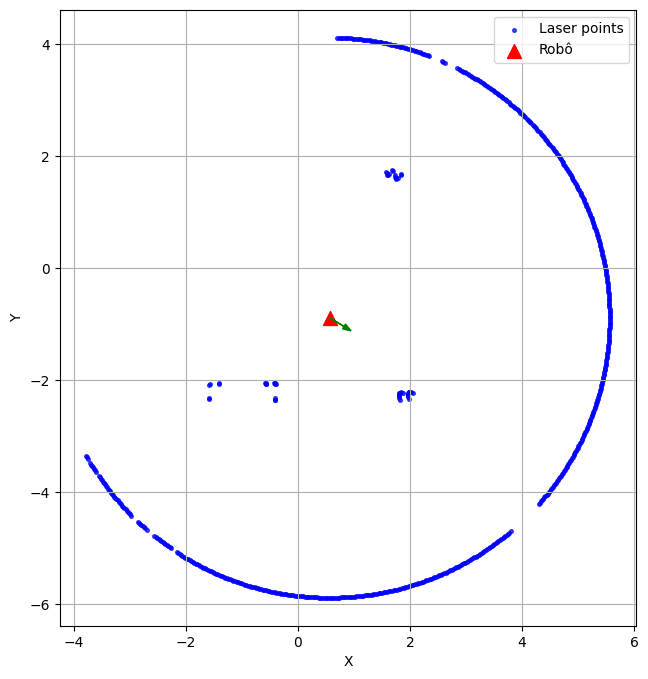

In [ ]:

def laser_points_to_world(sim, robotHandle, laserHandle, laser_data):
    # Posição do laser em relação ao robô
    pos_RL = sim.getObjectPosition(laserHandle, robotHandle)
    ori_RL = sim.getObjectOrientation(laserHandle, robotHandle)
    x_rl, y_rl, theta_rl = pos_RL[0], pos_RL[1], ori_RL[2]

    # Posição do robô em relação ao mundo
    pos_WR = sim.getObjectPosition(robotHandle, sim.handle_world)
    ori_WR = sim.getObjectOrientation(robotHandle, sim.handle_world)
    x_wr, y_wr, theta_wr = pos_WR[0], pos_WR[1], ori_WR[2]

    # Transformação do laser em relação ao robô
    T_RL = np.array([
        [np.cos(theta_rl), -np.sin(theta_rl), x_rl],
        [np.sin(theta_rl),  np.cos(theta_rl), y_rl],
        [0, 0, 1]
    ])

    # Transformação do robô em relação ao mundo
    T_WR = np.array([
        [np.cos(theta_wr), -np.sin(theta_wr), x_wr],
        [np.sin(theta_wr),  np.cos(theta_wr), y_wr],
        [0, 0, 1]
    ])

    # Transformação final: Laser → Mundo
    T_WL = T_WR @ T_RL

    global_points = []
    for ang, dist in laser_data:
        pL = np.array([dist*np.cos(ang), dist*np.sin(ang), 1])
        pW = T_WL @ pL
        global_points.append([pW[0], pW[1]])

    return global_points, (x_wr, y_wr, theta_wr)

def plot_laiser():

    client = RemoteAPIClient()
    sim = client.require("sim")
    sim.setStepping(True)

    robotname = 'PioneerP3DX'
    robotHandle = sim.getObject('/' + robotname)
    laserHandle = sim.getObject('/' + robotname + '/fastHokuyo')

    sim.startSimulation()
    sim.step()

    hokuyo = HokuyoSensorSim(sim, "/" + robotname + "/fastHokuyo")

    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, aspect='equal')

    laser_data = hokuyo.getSensorData()
    global_pts, robot_pose = laser_points_to_world(sim, robotHandle, laserHandle, laser_data)

    lx, ly = zip(*global_pts)
    ax.scatter(lx, ly, s=7, c='blue', alpha=0.7, label="Laser points")

    # posição do robô (marcado como triângulo vermelho)
    x_r, y_r, theta_r = robot_pose
    ax.scatter(x_r, y_r, s=100, c='red', marker='^', label="Robô")
    ax.arrow(x_r, y_r, 0.3*np.cos(theta_r), 0.3*np.sin(theta_r),
            head_width=0.1, head_length=0.15, fc='green', ec='green')

    sim.stopSimulation()

    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.grid(True)
    ax.legend()
    plt.show()

plot_laiser()


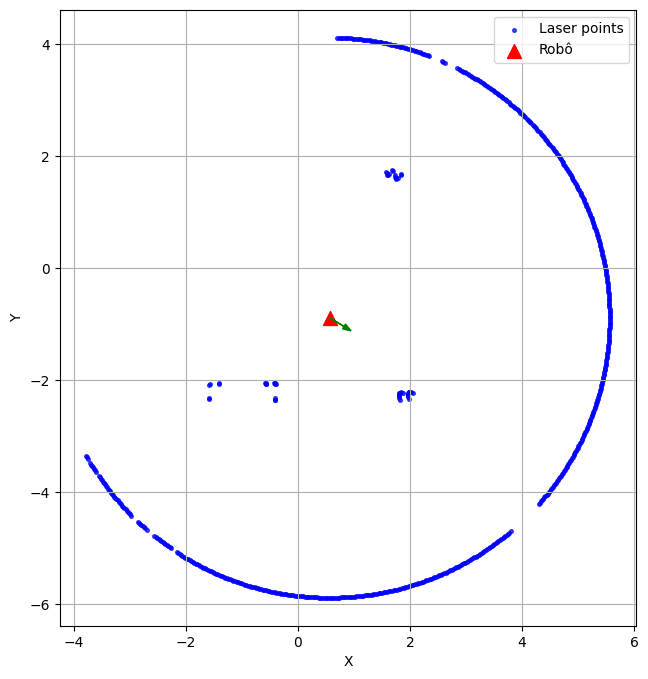

In [ ]:
plot_laiser()

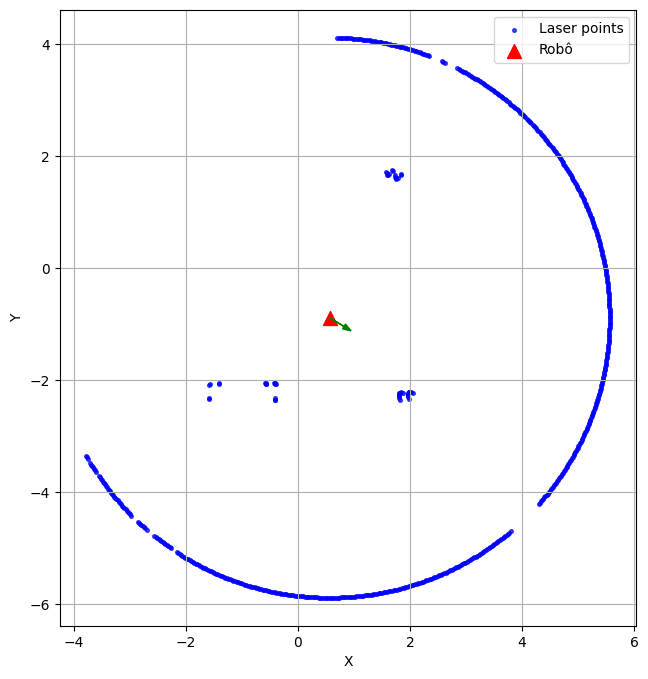

In [ ]:
plot_laiser()